In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cwd = os.getcwd()
file = os.path.join(cwd,'framingham.csv')
data = pd.read_csv(file)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
data.shape

(4240, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [20]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [38]:
(data.isna().sum()*100/len(data)).sort_values(ascending=False)

glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

In [43]:
df = pd.DataFrame({'index':data.isna().sum().index,'count':data.isna().sum().values})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'male'),
  Text(1, 0, 'age'),
  Text(2, 0, 'currentSmoker'),
  Text(3, 0, 'prevalentStroke'),
  Text(4, 0, 'prevalentHyp'),
  Text(5, 0, 'diabetes'),
  Text(6, 0, 'sysBP'),
  Text(7, 0, 'diaBP'),
  Text(8, 0, 'TenYearCHD'),
  Text(9, 0, 'heartRate'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'cigsPerDay'),
  Text(12, 0, 'totChol'),
  Text(13, 0, 'BPMeds'),
  Text(14, 0, 'education'),
  Text(15, 0, 'glucose')])

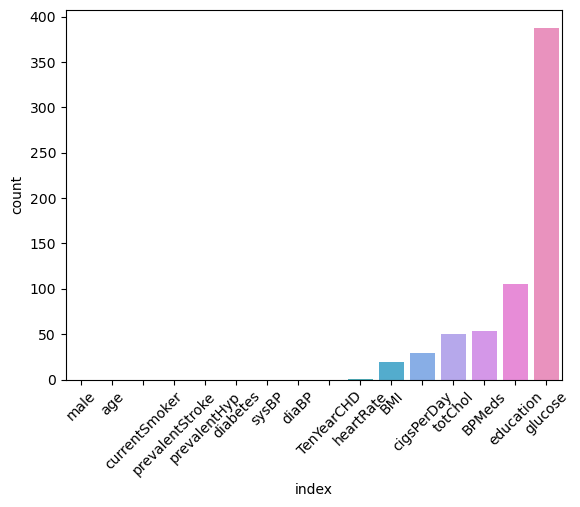

In [51]:
sns.barplot(data=df.sort_values(by='count'),x='index',y='count')
plt.xticks(rotation=45)

# Clean the glucose column

In [53]:
data['glucose'].isna().sum()

388

In [55]:
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [66]:
data['glucose'].isna().sum()

0

##  Fill na for education

In [60]:
data['education'].isna().sum()

105

In [78]:
data['education'].fillna(data['education'].mode()[0],inplace=True)

In [80]:
data['education'].isna().sum()

0

In [84]:
## Fill na for 
data['BPMeds'].describe()

count    4187.000000
mean        0.029615
std         0.169544
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [88]:
data.dropna(axis=0,subset=['BPMeds'],inplace=True)

# Clean TotChol

In [92]:
data['totChol'].isna().sum()

49

In [94]:
data['totChol'].fillna(data['totChol'].mean(),inplace=True)

In [95]:
data['totChol'].isna().sum()

0

# Cigs per day

In [97]:
data['cigsPerDay'].isna().sum()

29

In [98]:
data['cigsPerDay'].describe()

count    4158.000000
mean        9.016595
std        11.919745
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [100]:
data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0],inplace=True)

In [101]:
data['cigsPerDay'].isna().sum()

0

In [102]:
data['BMI'].isna().sum()

19

In [103]:
data['BMI'].fillna(data['BMI'].mean(),inplace=True)

In [104]:
data['BMI'].isna().sum()

0

In [105]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [106]:
data.dropna(axis=0,subset=['heartRate'],inplace=True)

In [107]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Data Types

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4186 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4186 non-null   int64  
 1   age              4186 non-null   int64  
 2   education        4186 non-null   float64
 3   currentSmoker    4186 non-null   int64  
 4   cigsPerDay       4186 non-null   float64
 5   BPMeds           4186 non-null   float64
 6   prevalentStroke  4186 non-null   int64  
 7   prevalentHyp     4186 non-null   int64  
 8   diabetes         4186 non-null   int64  
 9   totChol          4186 non-null   float64
 10  sysBP            4186 non-null   float64
 11  diaBP            4186 non-null   float64
 12  BMI              4186 non-null   float64
 13  heartRate        4186 non-null   float64
 14  glucose          4186 non-null   float64
 15  TenYearCHD       4186 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 556.0 KB


In [109]:
to_categorical = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

for col in to_categorical:
    data[col] = data[col].astype('category')


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4186 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4186 non-null   category
 1   age              4186 non-null   int64   
 2   education        4186 non-null   category
 3   currentSmoker    4186 non-null   category
 4   cigsPerDay       4186 non-null   float64 
 5   BPMeds           4186 non-null   category
 6   prevalentStroke  4186 non-null   category
 7   prevalentHyp     4186 non-null   category
 8   diabetes         4186 non-null   category
 9   totChol          4186 non-null   float64 
 10  sysBP            4186 non-null   float64 
 11  diaBP            4186 non-null   float64 
 12  BMI              4186 non-null   float64 
 13  heartRate        4186 non-null   float64 
 14  glucose          4186 non-null   float64 
 15  TenYearCHD       4186 non-null   category
dtypes: category(8), float64(7), int64(1)
memor

# Correlation Analysis

In [113]:
data.corr()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.189568,0.258760,0.392546,0.208112,0.134710,-0.012305,0.116316
cigsPerDay,-0.189568,1.000000,-0.026307,-0.086508,-0.054050,-0.090694,0.072639,-0.054207
totChol,0.258760,-0.026307,1.000000,0.208449,0.164986,0.120245,0.091462,0.044933
sysBP,0.392546,-0.086508,0.208449,1.000000,0.785208,0.327464,0.181134,0.134377
diaBP,0.208112,-0.054050,0.164986,0.785208,1.000000,0.380045,0.179297,0.060042
BMI,0.134710,-0.090694,0.120245,0.327464,0.380045,1.000000,0.066934,0.081366
heartRate,-0.012305,0.072639,0.091462,0.181134,0.179297,0.066934,1.000000,0.091527
glucose,0.116316,-0.054207,0.044933,0.134377,0.060042,0.081366,0.091527,1.000000


<AxesSubplot:>

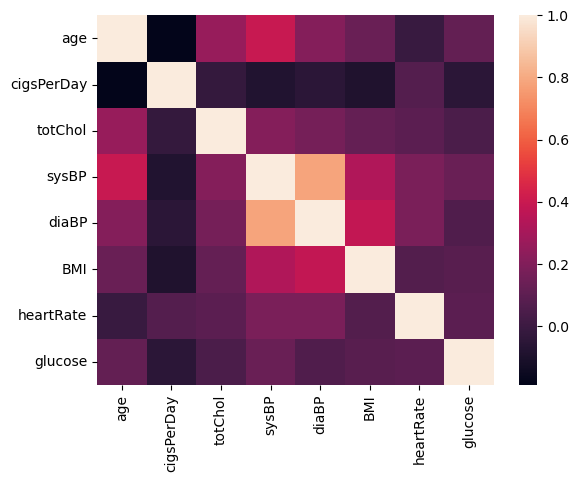

In [114]:
sns.heatmap(data.corr())

In [115]:
# Delete diaBP column as it is highly correlated to sysBP

In [116]:
data.drop(['diaBP'],axis=1,inplace=True)

<AxesSubplot:>

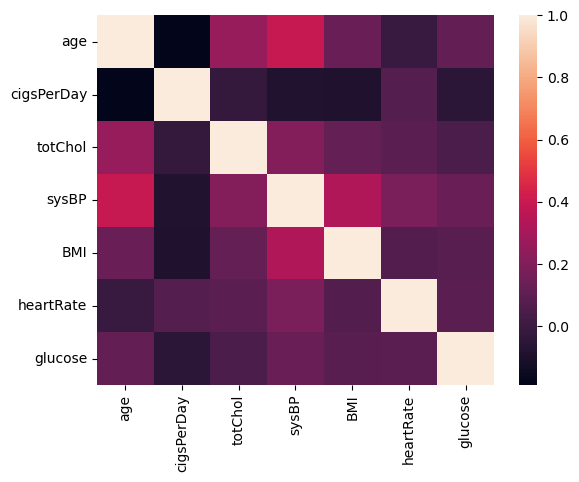

In [117]:
sns.heatmap(data.corr())

In [119]:
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               233
BMI                1360
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [121]:

for col in ['glucose','totChol','BMI']:
    data[col] = data[col].round(1)

In [122]:
data.to_csv('clean.csv')